In [192]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,mean_absolute_error,precision_score,r2_score,mean_squared_error
from sklearn.pipeline import Pipeline 


In [193]:
heart = pd.read_csv('heart_disease_uci.csv')
heart.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [194]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [195]:
print(heart.isnull().sum().sort_values(ascending=False))

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
id            0
age           0
sex           0
dataset       0
cp            0
num           0
dtype: int64


In [196]:
heart['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

Mean: 53.51086956521739
Median: 54.0
Mode: 54


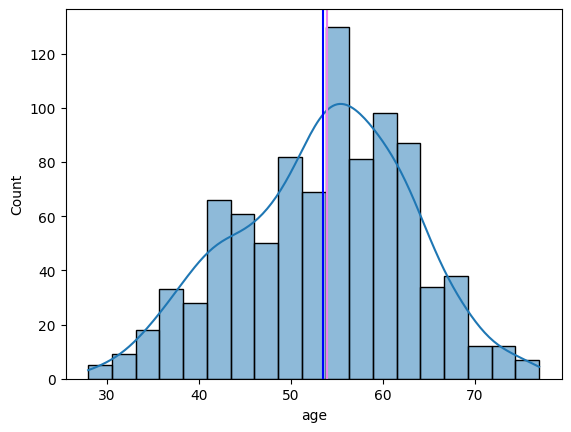

In [197]:
sns.histplot(heart['age'],kde=True)
plt.axvline(heart['age'].mean(),color='blue')
plt.axvline(heart['age'].median(),color = 'yellow')
plt.axvline(heart['age'].mode()[0],color='violet')
print('Mean:',heart['age'].mean())
print('Median:', heart['age'].median())
print('Mode:', heart['age'].mode()[0])

In [198]:
fig = px.histogram(data_frame=heart, x='age', color='sex')
fig.show()

In [199]:
grouped_stats = heart.groupby('dataset')['age'].agg(['mean', 'median', lambda x: x.mode().iloc[0] if not x.mode().empty else None])


grouped_stats.columns = ['mean_age', 'median_age', 'mode_age']


print(grouped_stats.round())

               mean_age  median_age  mode_age
dataset                                      
Cleveland          54.0        56.0        58
Hungary            48.0        49.0        54
Switzerland        55.0        56.0        61
VA Long Beach      59.0        60.0        62


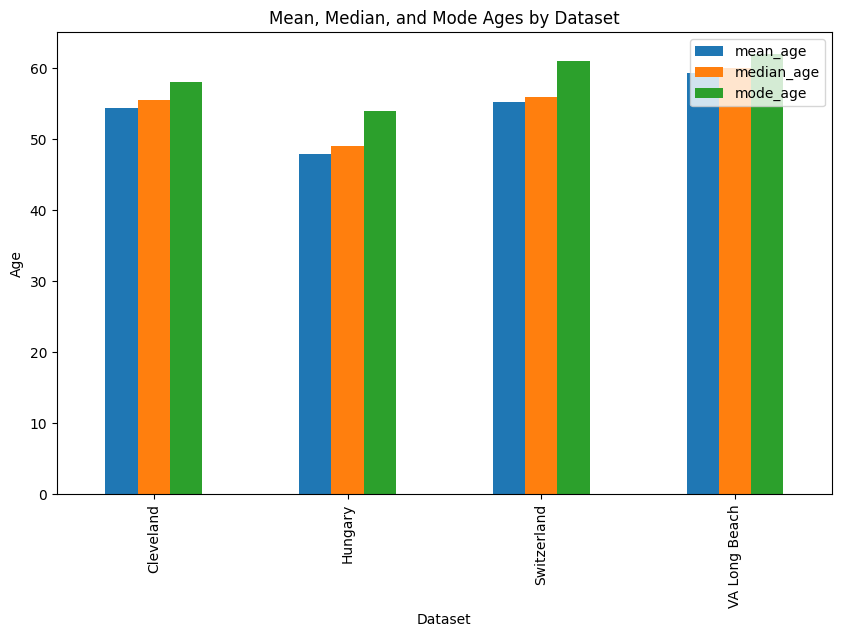

In [200]:
grouped_stats.plot(kind='bar', figsize=(10, 6))
plt.title('Mean, Median, and Mode Ages by Dataset')
plt.xlabel('Dataset')
plt.ylabel('Age')
plt.legend(loc='upper right')
plt.show()

In [201]:
print(heart['sex'].value_counts())

Male      726
Female    194
Name: sex, dtype: int64


In [202]:
male = 726 
female = 194 
total = male + female 
male_percentage = (male/total) * 100
female_percentage = (female/total) * 100
print(f"female percentage is:{female_percentage:.2f}%")
print(f"male percentage is:{male_percentage:.2f}%")
difference_percentage = ((male - female) / female) * 100
print(f"Males are {difference_percentage:.2f}% more than females in the data.")

female percentage is:21.09%
male percentage is:78.91%
Males are 274.23% more than females in the data.


In [203]:
(heart['dataset'].unique())

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [204]:
heart['dataset'].value_counts()

Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: dataset, dtype: int64

In [205]:
print(heart.groupby('sex')['dataset'].value_counts())

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: dataset, dtype: int64


In [206]:
fig = px.histogram(data_frame=heart, x='age', color='dataset')
fig.show()

# print the mean median and mode of age column grouped by dataset column
print(f"Mean of Data Set: {heart.groupby('dataset')['age'].mean()}")
print("-------------------------------------")
print(f"Median of Data Set: {heart.groupby('dataset')['age'].median()}")
print("-------------------------------------")
print(f"Mode of Data Set: {heart.groupby('dataset')['age'].agg(pd.Series.mode)}")
print("-------------------------------------")

Mean of Data Set: dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
-------------------------------------
Median of Data Set: dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
-------------------------------------
Mode of Data Set: dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object
-------------------------------------


In [207]:
print(heart['cp'].unique())

['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']


In [208]:
print(heart['cp'].value_counts())

asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: cp, dtype: int64


Axes(0.125,0.11;0.775x0.77)


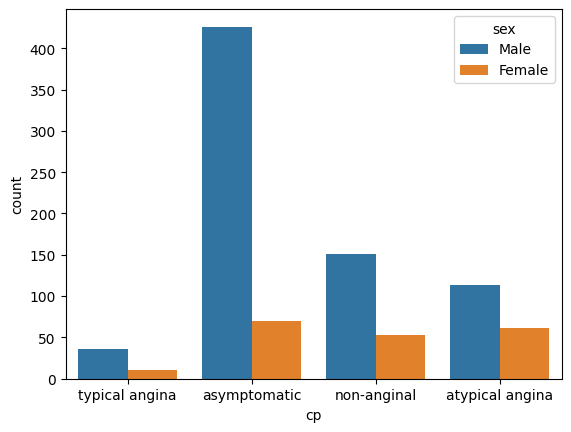

In [209]:
print(sns.countplot(heart, x='cp', hue='sex'))

In [210]:
print(heart.groupby('cp')['sex'].value_counts())

cp               sex   
asymptomatic     Male      426
                 Female     70
atypical angina  Male      113
                 Female     61
non-anginal      Male      151
                 Female     53
typical angina   Male       36
                 Female     10
Name: sex, dtype: int64


In [211]:
fig = px.histogram(data_frame=heart, x='age', color='cp')
fig.show()

# print the mean median and mode of age column grouped by dataset column
print(f"Mean of Data Set: {heart.groupby('cp')['age'].mean()}")
print("-------------------------------------")
print(f"Median of Data Set: {heart.groupby('cp')['age'].median()}")
print("-------------------------------------")
print(f"Mode of Data Set: {heart.groupby('cp')['age'].agg(pd.Series.mode)}")
print("-------------------------------------")

Mean of Data Set: cp
asymptomatic       54.959677
atypical angina    49.241379
non-anginal        53.333333
typical angina     54.826087
Name: age, dtype: float64
-------------------------------------
Median of Data Set: cp
asymptomatic       56.0
atypical angina    50.5
non-anginal        53.5
typical angina     59.0
Name: age, dtype: float64
-------------------------------------
Mode of Data Set: cp
asymptomatic             57
atypical angina          54
non-anginal        [51, 54]
typical angina           62
Name: age, dtype: object
-------------------------------------


In [212]:
heart['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

Axes(0.125,0.11;0.775x0.77)


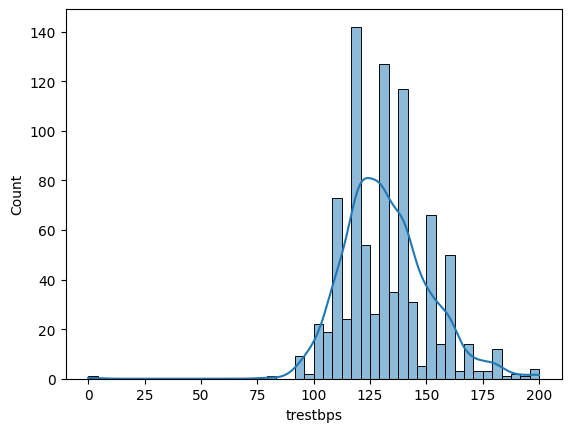

In [213]:
print(sns.histplot(heart['trestbps'], kde=True))


In [214]:
fig = px.histogram(data_frame=heart, x='trestbps', color='dataset')
fig.show()

In [215]:
heart.groupby(heart['sex'])[['trestbps']].describe()

trestbps                                                         
          count        mean        std   min    25%    50%    75%    max
sex                                                                     
Female    192.0  132.093750  19.509202  94.0  120.0  130.0  140.0  200.0
Male      669.0  132.143498  18.951807   0.0  120.0  130.0  140.0  200.0

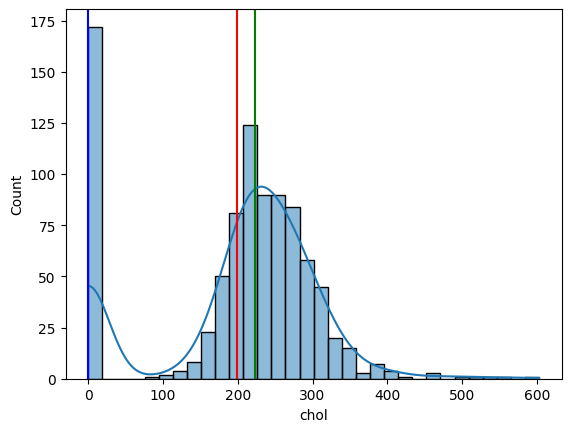

In [216]:
sns.histplot(heart['chol'], kde=True)
plt.axvline(heart['chol'].mean(), color='red')
plt.axvline(heart['chol'].median(), color='green')
plt.axvline(heart['chol'].mode()[0], color='blue')

In [217]:
heart.groupby(heart['sex'])[['chol']].describe()

chol                                                         
        count        mean         std  min    25%    50%    75%    max
sex                                                                   
Female  187.0  241.481283   86.291226  0.0  204.0  244.0  291.0  564.0
Male    703.0  187.864865  113.858400  0.0  156.5  220.0  263.0  603.0

In [218]:
heart['fbs'].value_counts()

False    692
True     138
Name: fbs, dtype: int64

In [219]:
print(heart.groupby('fbs')['sex'].value_counts())

fbs    sex   
False  Male      528
       Female    164
True   Male      119
       Female     19
Name: sex, dtype: int64


In [220]:
fig = px.histogram(data_frame=heart, y='age',x = 'sex', color='fbs')
fig.show()

In [221]:
heart['restecg'].value_counts()

normal              551
lv hypertrophy      188
st-t abnormality    179
Name: restecg, dtype: int64

In [222]:
print(heart.groupby('restecg')['sex'].value_counts())

restecg           sex   
lv hypertrophy    Male      141
                  Female     47
normal            Male      432
                  Female    119
st-t abnormality  Male      151
                  Female     28
Name: sex, dtype: int64


In [223]:
print(heart.groupby('restecg')['dataset'].value_counts())

restecg           dataset      
lv hypertrophy    Cleveland        149
                  VA Long Beach     27
                  Switzerland        7
                  Hungary            5
normal            Hungary          235
                  Cleveland        151
                  Switzerland       85
                  VA Long Beach     80
st-t abnormality  VA Long Beach     93
                  Hungary           52
                  Switzerland       30
                  Cleveland          4
Name: dataset, dtype: int64


Axes(0.125,0.11;0.775x0.77)


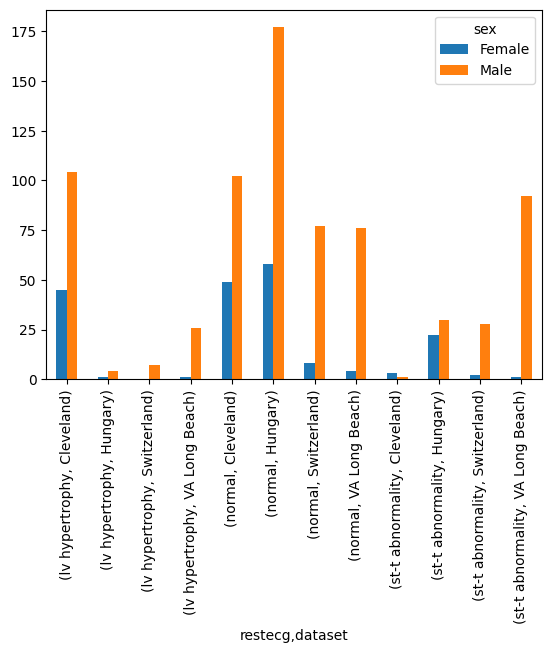

In [224]:
counts = heart.groupby(heart['restecg'])[['dataset','sex']].value_counts().unstack()
print(counts.plot.bar())

In [225]:
counts = heart.groupby(heart['restecg'])[['dataset','sex']].value_counts().unstack()
print(counts)

sex                             Female   Male
restecg          dataset                     
lv hypertrophy   Cleveland        45.0  104.0
                 Hungary           1.0    4.0
                 Switzerland       NaN    7.0
                 VA Long Beach     1.0   26.0
normal           Cleveland        49.0  102.0
                 Hungary          58.0  177.0
                 Switzerland       8.0   77.0
                 VA Long Beach     4.0   76.0
st-t abnormality Cleveland         3.0    1.0
                 Hungary          22.0   30.0
                 Switzerland       2.0   28.0
                 VA Long Beach     1.0   92.0


In [226]:
counts = heart.groupby(heart['restecg'])[['sex']].value_counts()
print(counts)

restecg           sex   
lv hypertrophy    Male      141
                  Female     47
normal            Male      432
                  Female    119
st-t abnormality  Male      151
                  Female     28
dtype: int64


Axes(0.125,0.11;0.775x0.77)


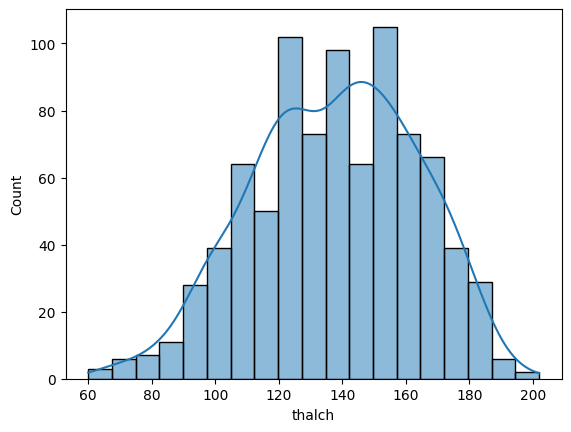

In [227]:
print(sns.histplot(heart['thalch'],kde = True))


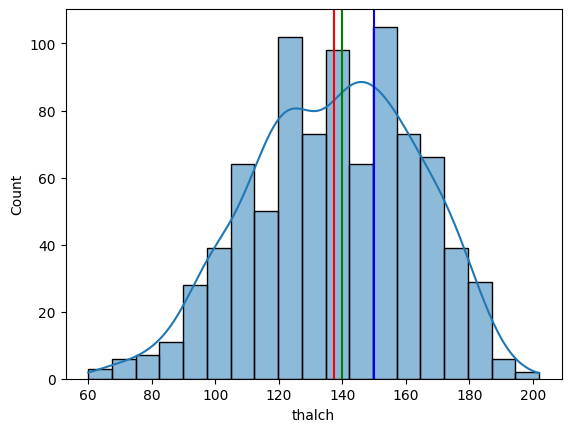

In [228]:
sns.histplot(heart['thalch'], kde=True)
plt.axvline(heart['thalch'].mean(), color='red')
plt.axvline(heart['thalch'].median(), color='green')
plt.axvline(heart['thalch'].mode()[0], color='blue')

In [229]:
grouped_stats = heart.groupby('dataset')['thalch'].agg(['mean', 'median', lambda x: x.mode().iloc[0] if not x.mode().empty else None])

# Renaming the columns for clarity
grouped_stats.columns = ['mean_thalch', 'median_thalch', 'mode_thalch']

# Displaying the observations
print(grouped_stats.round())

               mean_thalch  median_thalch  mode_thalch
dataset                                               
Cleveland            150.0          153.0        162.0
Hungary              139.0          140.0        150.0
Switzerland          122.0          121.0        120.0
VA Long Beach        123.0          120.0        120.0


In [230]:
heart['exang'].value_counts()

False    528
True     337
Name: exang, dtype: int64

In [231]:
heart.groupby(heart['exang'])[['sex']].value_counts()


exang  sex   
False  Male      379
       Female    149
True   Male      294
       Female     43
dtype: int64

In [232]:
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame
grouped_counts = heart.groupby(['restecg', 'exang']).size().reset_index(name='count')

fig = px.bar(grouped_counts, x='exang', y='count', color='restecg',
             text='count', facet_col='restecg', facet_col_wrap=3,
             labels={'exang': 'Exang', 'count': 'Count'})

fig.update_layout(title='Exang Counts by Restecg',
                  xaxis_title='Exang',
                  yaxis_title='Count')

fig.show()

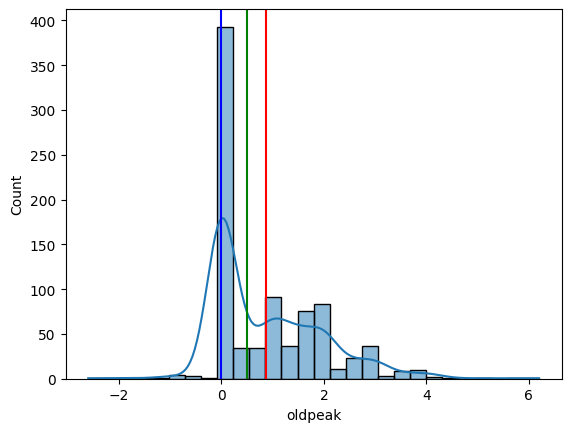

In [233]:
sns.histplot(heart['oldpeak'], kde=True)
plt.axvline(heart['oldpeak'].mean(), color='red')
plt.axvline(heart['oldpeak'].median(), color='green')
plt.axvline(heart['oldpeak'].mode()[0], color='blue')

In [234]:
heart['slope'].value_counts()

flat           345
upsloping      203
downsloping     63
Name: slope, dtype: int64

In [235]:
heart.groupby(heart['slope'])['restecg'].value_counts()

slope        restecg         
downsloping  normal               31
             lv hypertrophy       17
             st-t abnormality     15
flat         normal              206
             lv hypertrophy       84
             st-t abnormality     55
upsloping    normal              116
             lv hypertrophy       64
             st-t abnormality     22
Name: restecg, dtype: int64

In [236]:
heart['ca'].value_counts()


0.0    181
1.0     67
2.0     41
3.0     20
Name: ca, dtype: int64

In [237]:
print(heart['thal'].unique())


['fixed defect' 'normal' 'reversable defect' nan]


In [238]:
print(heart['thal'].value_counts())


normal               196
reversable defect    192
fixed defect          46
Name: thal, dtype: int64


In [239]:
heart.groupby(heart['thal'])['sex'].value_counts()


thal               sex   
fixed defect       Male       42
                   Female      4
normal             Male      110
                   Female     86
reversable defect  Male      171
                   Female     21
Name: sex, dtype: int64

In [240]:
heart.groupby(heart['thal'])[['sex','dataset']].value_counts()

thal               sex     dataset      
fixed defect       Male    Cleveland         17
                           Switzerland       10
                           VA Long Beach      8
                           Hungary            7
                   Female  Hungary            3
                           Cleveland          1
normal             Male    Cleveland         86
                   Female  Cleveland         80
                   Male    Switzerland       14
                           Hungary            6
                   Female  Switzerland        5
                   Male    VA Long Beach      4
                   Female  Hungary            1
reversable defect  Male    Cleveland        102
                           Switzerland       41
                           VA Long Beach     20
                   Female  Cleveland         15
                   Male    Hungary            8
                   Female  Hungary            3
                           VA Long Beach      2

In [241]:
heart.groupby(heart['thal'])['fbs'].value_counts()


thal               fbs  
fixed defect       False     28
                   True      12
normal             False    166
                   True      22
reversable defect  False    145
                   True      33
Name: fbs, dtype: int64

In [242]:
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame
grouped_counts = heart.groupby(['thal', 'sex', 'dataset']).size().reset_index(name='count')

fig = px.bar(grouped_counts, x='sex', y='count', color='dataset',
             facet_col='thal', facet_col_wrap=3,
             labels={'sex': 'Sex', 'count': 'Count', 'dataset': 'Dataset'},
             title='Counts by Thal and Sex')

fig.show()

In [243]:
print(heart['num'].unique())


[0 2 1 3 4]


In [244]:
heart['num'].value_counts()


0    411
1    265
2    109
3    107
4     28
Name: num, dtype: int64

In [245]:
heart.groupby(heart['num'])[['sex']].value_counts()


num  sex   
0    Male      267
     Female    144
1    Male      235
     Female     30
2    Male       99
     Female     10
3    Male       99
     Female      8
4    Male       26
     Female      2
dtype: int64

In [246]:
heart.groupby(heart['num'])[['dataset']].value_counts()


num  dataset      
0    Hungary          187
     Cleveland        165
     VA Long Beach     51
     Switzerland        8
1    Hungary          106
     VA Long Beach     56
     Cleveland         55
     Switzerland       48
2    VA Long Beach     41
     Cleveland         36
     Switzerland       32
3    VA Long Beach     42
     Cleveland         35
     Switzerland       30
4    Cleveland         13
     VA Long Beach     10
     Switzerland        5
dtype: int64

In [247]:
heart.groupby(heart['num'])[['dataset','sex']].value_counts()

num  dataset        sex   
0    Hungary        Male      118
     Cleveland      Male       93
                    Female     72
     Hungary        Female     69
     VA Long Beach  Male       48
     Switzerland    Male        8
     VA Long Beach  Female      3
1    Hungary        Male       94
     VA Long Beach  Male       53
     Cleveland      Male       46
     Switzerland    Male       42
     Hungary        Female     12
     Cleveland      Female      9
     Switzerland    Female      6
     VA Long Beach  Female      3
2    VA Long Beach  Male       41
     Switzerland    Male       29
     Cleveland      Male       29
                    Female      7
     Switzerland    Female      3
3    VA Long Beach  Male       42
     Switzerland    Male       29
     Cleveland      Male       28
                    Female      7
     Switzerland    Female      1
4    Cleveland      Male       11
     VA Long Beach  Male       10
     Switzerland    Male        5
     Cleveland      F

In [248]:
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame
grouped_counts = heart.groupby(['num', 'sex', 'dataset']).size().reset_index(name='count')

fig = px.bar(grouped_counts, x='sex', y='count', color='dataset',
             facet_col='num', facet_col_wrap=3,
             labels={'sex': 'Sex', 'count': 'Count', 'dataset': 'Dataset'},
             title='Counts by num and Sex')

fig.show()

In [249]:
heart.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


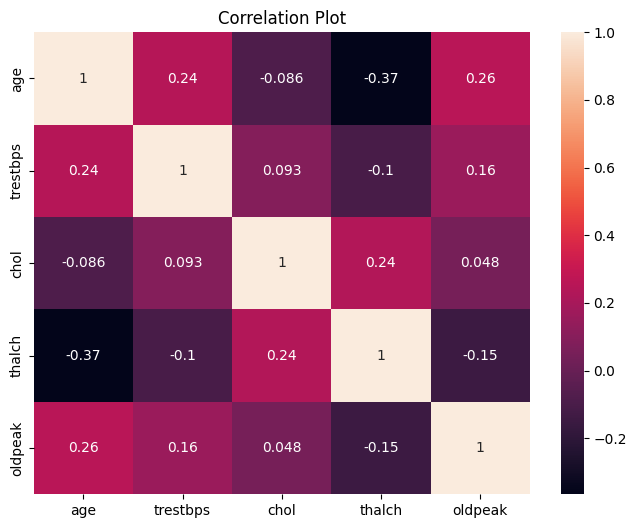

In [250]:
heart_corr = ['age','trestbps','chol','thalch','oldpeak']
plt.figure(figsize=(8,6))
sns.heatmap(heart[heart_corr].corr(),annot=True)
plt.title("Correlation Plot")
plt.show()

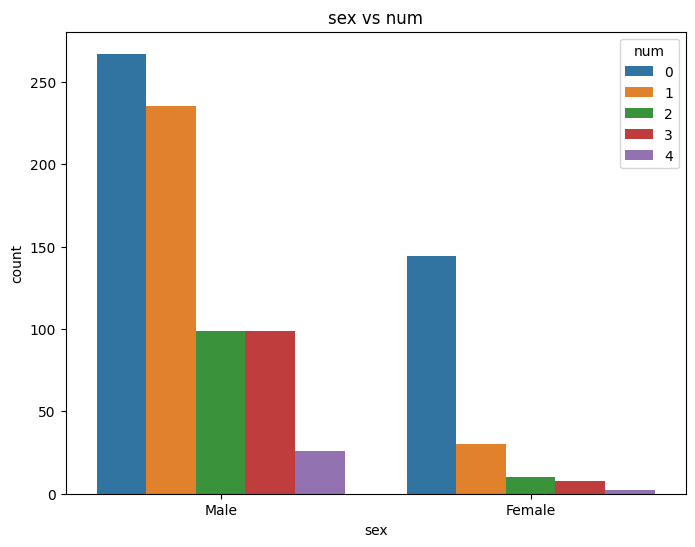

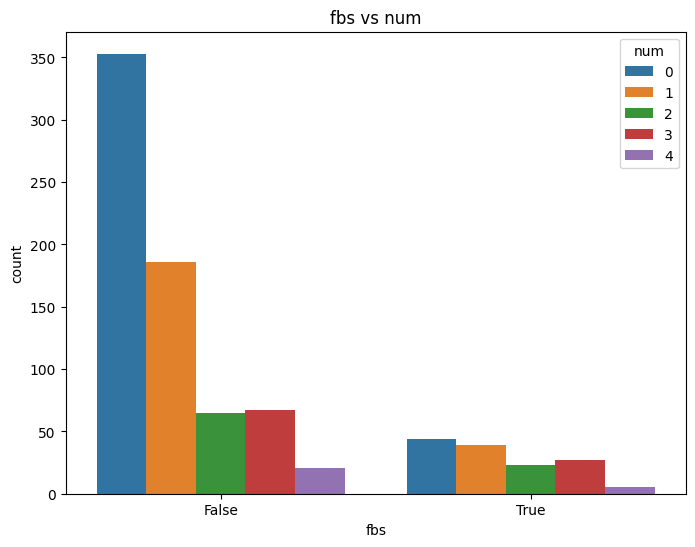

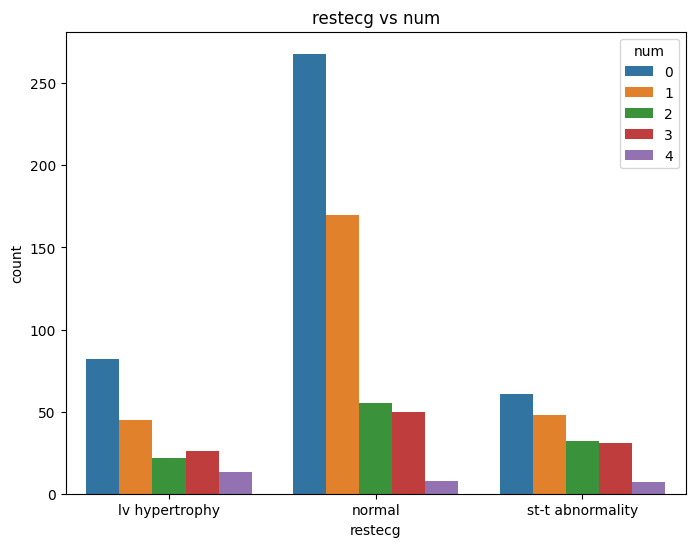

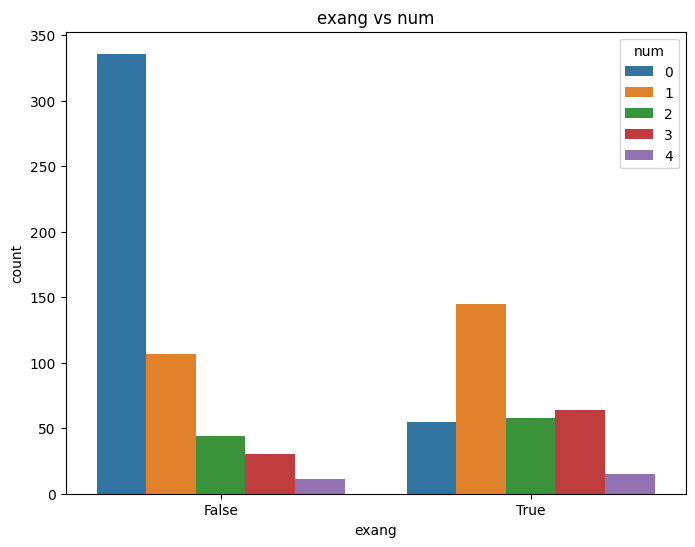

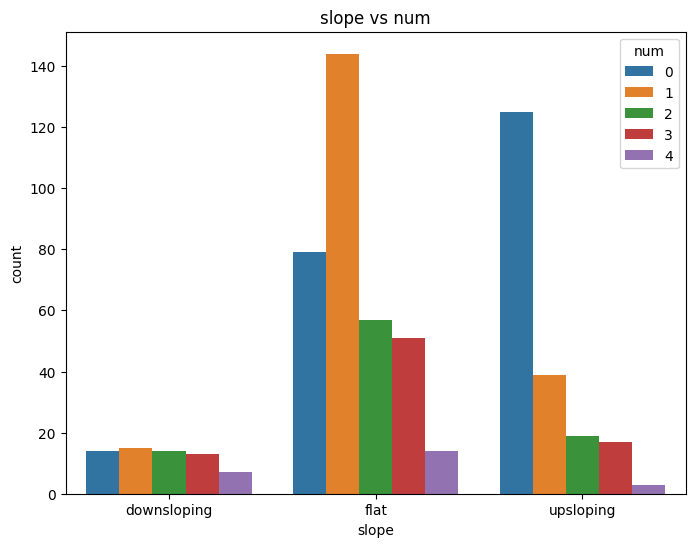

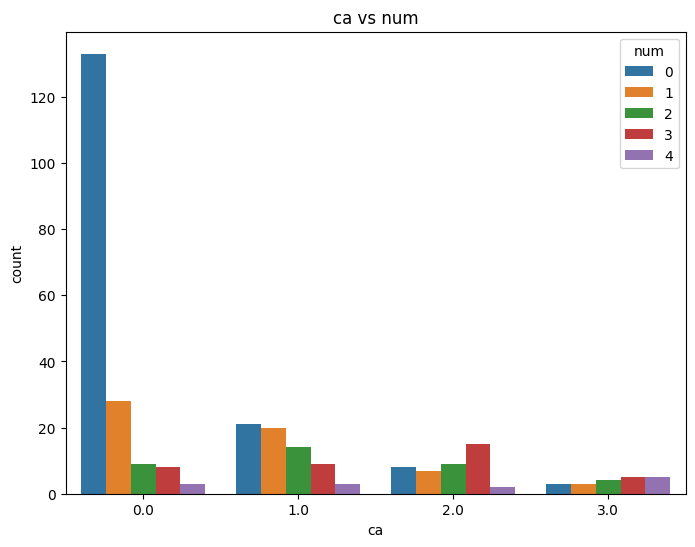

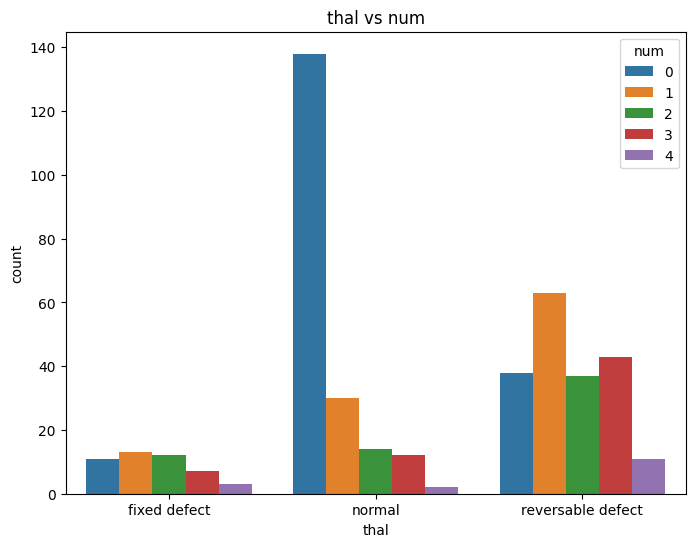

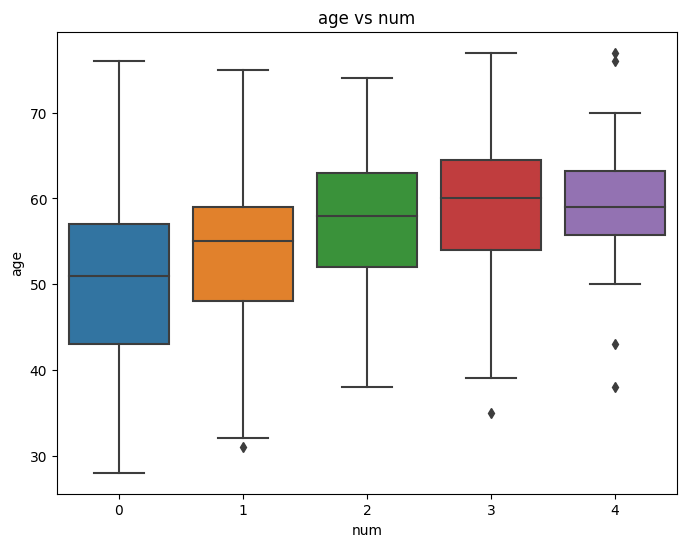

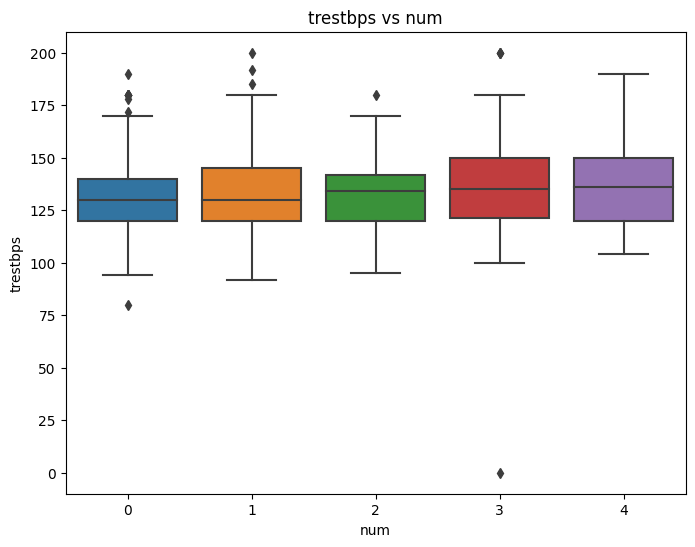

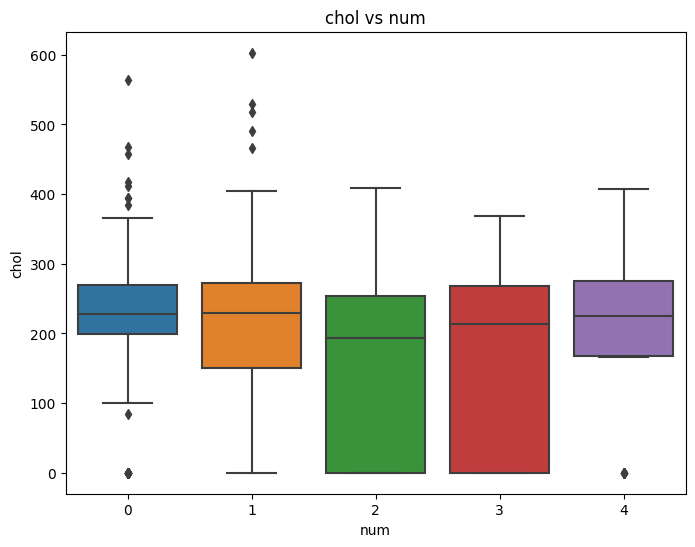

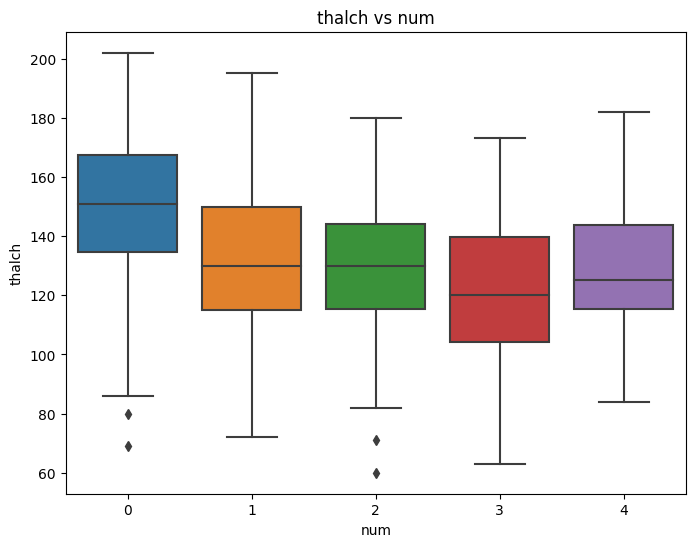

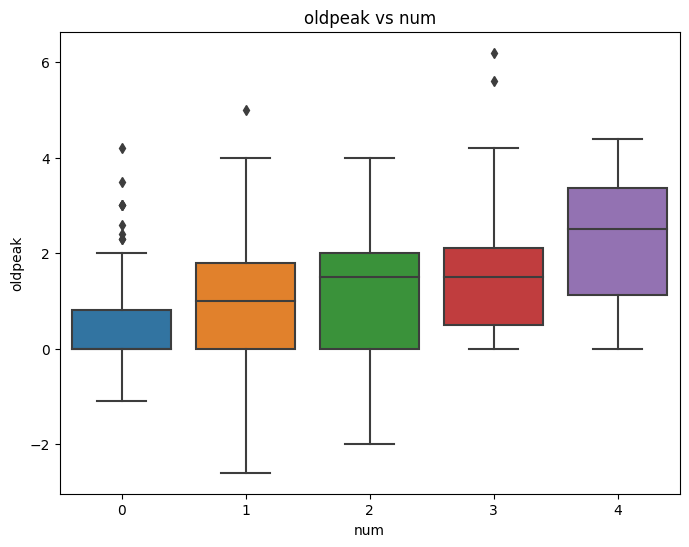

In [251]:
categorical_variables = ['sex','fbs','restecg','exang','slope','ca','thal']
numerical_variables = ['age','trestbps','chol','thalch','oldpeak']
target_variable = 'num'

for cat_var in categorical_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=cat_var, hue=target_variable, data=heart)
    plt.title(f"{cat_var} vs {target_variable}")
    plt.show()
    
for num_var in numerical_variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=target_variable, y=num_var, data=heart)
    plt.title(f"{num_var} vs {target_variable}")
    plt.show()

In [252]:
heart.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


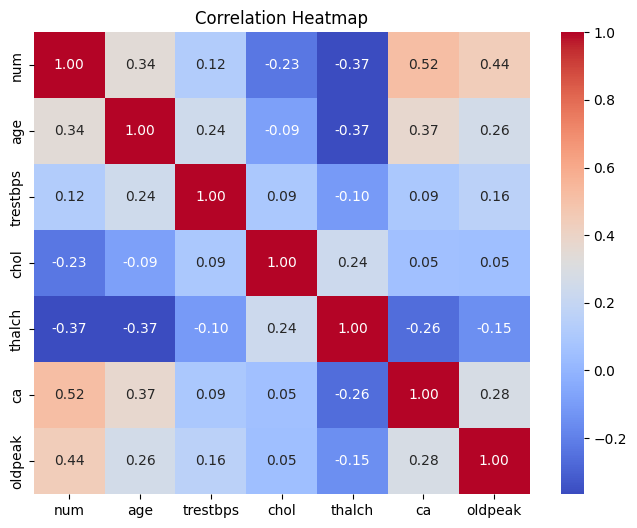

In [253]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'num' is the target variable
target_variable = 'num'

# Independent variables (features)
independent_variables = ['age','sex','cp','fbs','restecg','trestbps', 'chol', 'thalch','exang','slope','ca','thal', 'oldpeak']

# Combine the target variable and independent variables
variables_to_plot = [target_variable] + independent_variables

# Select the relevant columns from the DataFrame
df_subset = heart[variables_to_plot]

# Calculate the correlation matrix
correlation_matrix = df_subset.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [254]:
print(heart.isnull().sum().sort_values(ascending=False))

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
id            0
age           0
sex           0
dataset       0
cp            0
num           0
dtype: int64


In [255]:
heart.isnull().sum()[heart.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = heart.isnull().sum()[heart.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [256]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs','exang']
numeric_cols = ['oldpeak','thalch','chol','trestbps','age']

In [257]:
def impute_categorical_data(passed_col):
    heart_null = heart[heart[passed_col].isnull()]
    heart_not_null = heart[heart[passed_col].notnull()]
    X = heart_not_null.drop(passed_col,axis=1)
    y = heart_not_null[passed_col]
    
    other_missing_cols =  [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()
    
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
            
    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)
    
    for col in other_missing_cols:
        if X[col].isnull().sum()>0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    random_forest = RandomForestClassifier()
    random_forest.fit(X_train,y_train)
    y_pred = random_forest.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("The feature '"+ passed_col+ "' has been imputed with", round((accuracy * 100), 2), "accuracy\n")
    
    X = heart_null.drop(passed_col, axis=1)
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
        
    if len(heart_null) > 0:
        heart_null[passed_col] = random_forest.predict(X)
        # Map predicted boolean values back to True/False if the target variable is boolean
        if passed_col in bool_cols:
            heart_null[passed_col] = heart_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass
    
    heart_combined = pd.concat([heart_not_null, heart_null])
    return heart_combined[passed_col]

def impute_continuous_data(passed_col):
    heart_null = heart[heart[passed_col].isnull()]
    heart_not_null = heart[heart[passed_col].notnull()]
    X = heart_not_null.drop(passed_col,axis=1)
    y = heart_not_null[passed_col]
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
            
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)
    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a RandomForestRegressor on the non-missing data
    random_forest = RandomForestRegressor()
    random_forest.fit(X_train, y_train)

    # Predict the target variable for the missing data
    y_pred = random_forest.predict(X_test)

    # Print regression performance metrics
    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    # Prepare the missing data for imputation
    X = heart_null.drop(passed_col, axis=1)
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
            
    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(heart_null) > 0: 
        heart_null[passed_col] = random_forest.predict(X)
    else:
        pass

    df_combined = pd.concat([heart_not_null, heart_null])
    
    return df_combined[passed_col]

In [258]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((heart[col].isnull().sum() / len(heart)) * 100, 2))+"%")
    if col in categorical_cols:
        heart[col] = impute_categorical_data(col)
    elif col in numeric_cols:
        heart[col] = impute_continuous_data(col)
    else:
        pass


Missing Values trestbps : 6.41%
MAE = 13.331965317919074 

RMSE = 17.18116328064839 

R2 = 0.07831413432925494 

Missing Values chol : 3.26%
MAE = 44.78825842696629 

RMSE = 63.2029526182355 

R2 = 0.6835585394025798 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 80.72 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 67.93 accuracy

Missing Values thalch : 5.98%
MAE = 16.809826589595378 

RMSE = 21.71603006651333 

R2 = 0.31427468586036655 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 78.61 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5529476744186046 

RMSE = 0.7879122582776499 

R2 = 0.40855595927821997 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 66.67 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 66.13 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 71.26 accuracy



In [259]:
print(heart.isnull().sum())

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [260]:
heart.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [261]:
columns_to_scale = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']
minmax_scaler={}
for col in columns_to_scale:
    minmax = MinMaxScaler()
    heart[col] = minmax.fit_transform(heart[[col]])
    minmax_scaler[col] = minmax

In [262]:
encoded_columns = ['sex','dataset','cp','fbs','restecg','exang','slope','ca','thal']
label_encoder = {}
for col in encoded_columns:
    encode = LabelEncoder()
    heart[col] = encode.fit_transform(heart[[col]])
    label_encoder[col] = encode


In [271]:
heart.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,0.714286,1,0,3,0.725,0.386401,1,0,0.633803,0,0.556818,0,0,0,0
1,2,0.795918,1,0,0,0.800,0.474295,0,0,0.338028,1,0.465909,1,3,1,2
2,3,0.795918,1,0,0,0.600,0.379768,0,0,0.485915,1,0.590909,1,2,2,1
3,4,0.183673,1,0,2,0.650,0.414594,0,1,0.894366,0,0.693182,0,0,1,0
4,5,0.265306,0,0,1,0.650,0.338308,0,0,0.788732,0,0.454545,2,0,1,0


In [284]:
unique_labels = heart['num'].unique()
print(unique_labels)


[0 2 1 3 4]


In [ ]:
from imblearn.over_sampling import SMOTE
X = heart.drop(columns=['num'])  # Features
y = heart['num']  # Target variable

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Print the shapes of the new splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1644, 15)
X_test shape: (411, 15)
y_train shape: (1644,)
y_test shape: (411,)


In [ ]:
heart[heart['trestbps'] == 0]
# remove this row:
heart = heart.drop(heart[heart['trestbps'] == 0].index)

In [ ]:
print("So The number of row after removing 0 from the column trestbps are:)",heart.shape)

So The number of row after removing 0 from the column trestbps are:) (919, 16)


In [ ]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report
xgboost = xgb.XGBClassifier(random_state = 42)
xgboost.fit(X_train,y_train)
xgb_predict = xgboost.predict(X_test)
#xgb_auc = roc_auc_score(y_test, xgb_predict)
#fpr,tpr = roc_curve(y_test,xgb_predict)

accuracy = accuracy_score(y_test,xgb_predict)
print(f"XGBoost Accuracy: {accuracy:.2f}")
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_predict))


XGBoost Accuracy: 0.85
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        85
           1       0.82      0.67      0.73        81
           2       0.76      0.94      0.84        72
           3       0.85      0.85      0.85        84
           4       0.98      0.96      0.97        89

    accuracy                           0.85       411
   macro avg       0.85      0.85      0.85       411
weighted avg       0.85      0.85      0.85       411



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train a Random Forest classifier
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
random_forest_predictions = random_forest_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, random_forest_predictions)
print(f"Random Forest Accuracy: {accuracy:.2f}")

# Print classification report for detailed metrics
print("Random Forest Classification Report:")
print(classification_report(y_test, random_forest_predictions))

Random Forest Accuracy: 0.87
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        85
           1       0.84      0.67      0.74        81
           2       0.81      0.96      0.88        72
           3       0.86      0.87      0.86        84
           4       0.98      0.99      0.98        89

    accuracy                           0.87       411
   macro avg       0.87      0.87      0.87       411
weighted avg       0.87      0.87      0.87       411



In [ ]:
X.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [ ]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# Identify numerical and categorical columns
columns_to_scale = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']
encoded_columns = ['thal', 'ca', 'dataset', 'slope', 'exang', 'restecg', 'fbs', 'cp', 'sex']

# Create transformers for scaling
numeric_transformer = ('scale', MinMaxScaler(), columns_to_scale)
#categorical_transformer = ('encode',LabelEncoder(),encoded_columns)

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[numeric_transformer],
    remainder='passthrough'
)

# Create the RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=42)

# Create the pipeline with SMOTE
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', random_forest_model)
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Evaluate the pipeline on the test set
accuracy = pipeline.score(X_test, y_test)
print(f"Pipeline Accuracy: {accuracy:.2f}")
y_pred=pipeline.predict(X_test)
MAE = mean_absolute_error(y_test,y_pred)
print("MEAN_ABSOLUTE_ERROR:",MAE)



Pipeline Accuracy: 0.87
MEAN_ABSOLUTE_ERROR: 0.1897810218978102


In [ ]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(random_forest_model,X_balanced,y_balanced,cv=5)
print("Cross-validation Scores:",cv_score)
import numpy as np

mean_score = np.mean(cv_score)
std_score = np.std(cv_score)

print(f"Mean Cross-Validation Score: {mean_score:.2f}")
print(f"Standard Deviation of Cross-Validation Scores: {std_score:.2f}")


Cross-validation Scores: [0.75182482 0.83211679 0.82238443 0.89294404 0.77858881]
Mean Cross-Validation Score: 0.82
Standard Deviation of Cross-Validation Scores: 0.05


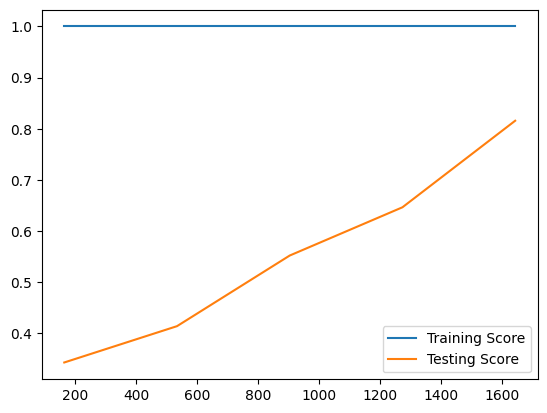

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Plot learning curves
train_sizes, train_scores, test_scores = learning_curve(random_forest_model, X_balanced, y_balanced, cv=5)
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Testing Score')
plt.legend()
plt.show()

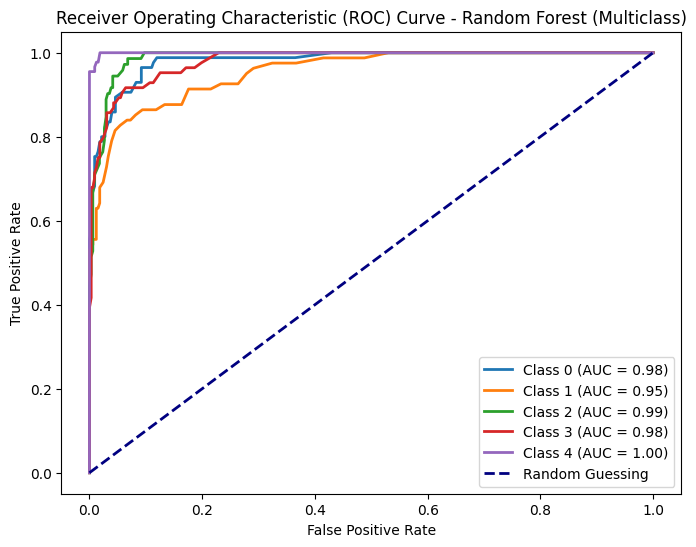

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier

# Assuming you have X_train, X_test, y_train, and y_test from your dataset

# Create and train a Random Forest classifier
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set and get predicted probabilities for each class
random_forest_probabilities = random_forest_model.predict_proba(X_test)

# Compute ROC curve and AUC for each class
plt.figure(figsize=(8, 6))
for i in range(random_forest_probabilities.shape[1]):
    fpr, tpr, thresholds = roc_curve(y_test == i, random_forest_probabilities[:, i])
    roc_auc = roc_auc_score(y_test == i, random_forest_probabilities[:, i])
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest (Multiclass)')
plt.legend(loc='lower right')
plt.show()



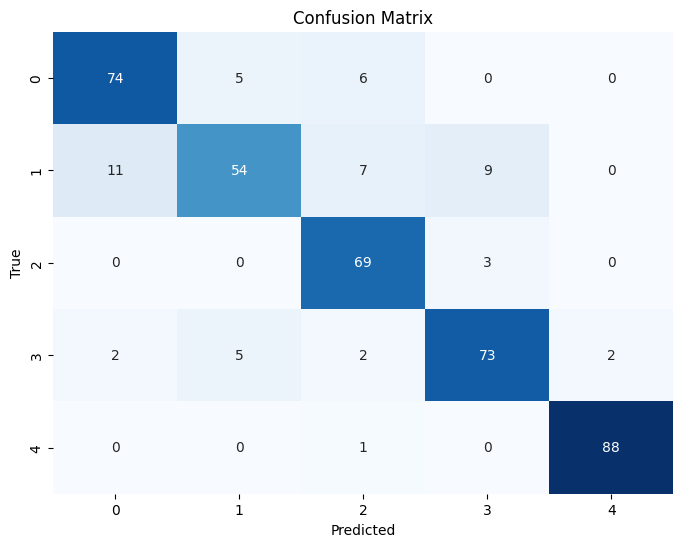

In [ ]:
cm = confusion_matrix(y_test, random_forest_predictions)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
for col, scaler in minmax_scaler.items():
    # Use inverse_transform to get the original values
    heart[col] = scaler.inverse_transform(heart[[col]])

In [ ]:
encoded_columns

['thal', 'ca', 'dataset', 'slope', 'exang', 'restecg', 'fbs', 'cp', 'sex']

In [ ]:
for col in encoded_columns:
    # Retrieve the corresponding LabelEncoder for the column
    encode = label_encoder[col]

    # Inverse transform the data
    heart[col] = encode.inverse_transform(heart[col])

In [ ]:
print(heart['sex'].unique())

['Male' 'Female']


In [ ]:
classification_dummy_data = {
    'id': [4],  # Assuming 'id' is a feature in your dataset
    'age': [45.0],
    'sex': ['Female'],
    'dataset': ['Cleveland'],
    'cp': ['atypical angina'],
    'trestbps': [130.0],
    'chol': [240.0],
    'fbs': [False],
    'restecg': ['normal'],
    'thalch': [145.0],
    'exang': [True],
    'oldpeak': [1.5],
    'slope': ['flat'],
    'ca': [1.0],
    'thal': ['reversable defect'],
}



# Convert the dictionary to a pandas DataFrame
new_X = pd.DataFrame(classification_dummy_data)

# Encode categorical or string features in the DataFrame
for col in new_X:
  if new_X[col].dtype == 'category' or new_X[col].dtype == 'object':
    new_X[col] = LabelEncoder().fit_transform(new_X[col])

In [ ]:
new_predictions = random_forest_model.predict(new_X)

# Display the predictions
print("Predictions:", new_predictions)

Predictions: [4]


In [ ]:
import pickle 
pickle.dump(heart,open('heart.pkl','wb'))
pickle.dump(pipeline,open('pipe.pkl','wb'))

In [ ]:
heart.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63.0,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67.0,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67.0,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37.0,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41.0,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


TURNING INTO ML PIPELINES WITH ZENML 

In [ ]:
from zenml import step 
from typing_extensions import Annotated 
from typing import Tuple

In [ ]:
step1 

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 step1                                                                                        │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'step1' is not defined

In [ ]:
X_train.columns